In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_excel(r'C:\Jypiter\data_for_lab_3.xlsx')
df.head(10)

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-07-02
5,1970,1,1,United States,North America,37.005105,-89.176269,1970-01-01
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,1970-01-02
7,1970,1,2,United States,North America,37.791927,-122.225906,1970-01-02
8,1970,1,2,United States,North America,43.076592,-89.412488,1970-01-02
9,1970,1,3,United States,North America,43.072950,-89.386694,1970-01-03
10,1970,1,1,United States,North America,43.468500,-89.744299,1970-01-01
11,1970,1,6,United States,North America,39.758968,-104.876305,1970-01-06
12,1970,1,8,Italy,Western Europe,41.890961,12.490069,1970-01-08
13,1970,1,9,United States,North America,42.331685,-83.047924,1970-01-09


In [57]:
data = ['latitude','longitude']
df = df.loc[:, data]
len_pr = df.shape[0]
df.head(10)

,latitude,longitude
0,18.456792,-69.951164
5,37.005105,-89.176269
6,-34.891151,-56.187214
7,37.791927,-122.225906
8,43.076592,-89.412488
9,43.072950,-89.386694
10,43.468500,-89.744299
11,39.758968,-104.876305
12,41.890961,12.490069
13,42.331685,-83.047924


In [17]:
#index = list(range(1,len_pr))
index = df.index 
columns = df.columns 

#list(range(1,len_pr))

scaled = (df - df.mean(axis=0))/df.std() 
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,latitude,longitude
0,-0.271918,-1.692974
5,0.728250,-2.025546
6,-3.148563,-1.454874
7,0.770677,-2.597266
8,1.055638,-2.029632


In [19]:
kmeans = KMeans(n_clusters=3, random_state=17) 
kmeans.fit(scaled_data); 
scaled_data['kmeans'] = kmeans.labels_
cluster_dict={}

for i in range(3):
    clust_list = scaled_data[scaled_data['kmeans']==i][data].index.values 
    print('Состав кластера {}: {}' 
          .format(i, clust_list))
    
N_CLUSTERS = {
    "complete" : 3,
    "ward"     : 3,
    "kmeans"  : 3,
}

kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=17)
kmeans.fit(scaled_data)
scaled_data['kmeans'] = kmeans.labels_
print('\n')
print(scaled_data)

Состав кластера 0: [     0      5      6 ... 176161 176290 176361]
Состав кластера 1: [    12     15     33 ... 176384 176386 176409]
Состав кластера 2: [    25    147    165 ... 176385 176398 176413]


        latitude  longitude  kmeans
0      -0.271918  -1.692974       0
5       0.728250  -2.025546       0
6      -3.148563  -1.454874       0
7       0.770677  -2.597266       0
8       1.055638  -2.029632       0
9       1.055442  -2.029186       0
10      1.076771  -2.035372       0
11      0.876744  -2.297138       0
12      0.991706  -0.266836       1
13      1.015471  -1.919533       0
14     -0.275685  -1.625681       0
15      1.563853  -0.251064       1
16      0.927332  -1.761827       0
17     -0.276059  -1.621699       0
18      1.300132  -2.599090       0
19      0.896037  -2.009337       0
20     -3.148563  -1.454874       0
21      1.300132  -2.599090       0
22      1.300132  -2.599090       0
23      0.928452  -1.764181       0
24     -0.478652  -2.048948       0
25   

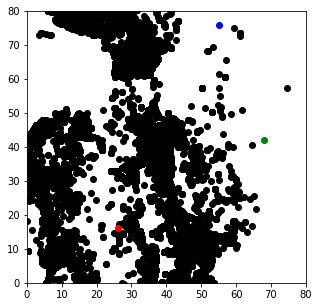

In [25]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['latitude'], df['longitude'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [ ]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [ ]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

In [ ]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [ ]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [50]:
df = df.loc[:,['latitude','longitude']]
df.head()

KeyError: "None of [['latitude', 'longitude']] are in the [columns]"

In [51]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

TypeError: object of type 'map' has no len()

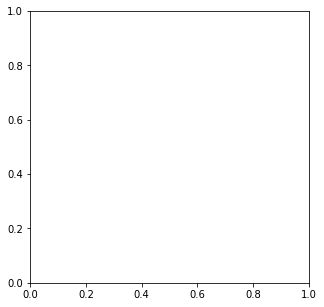

In [54]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()